<a href="https://colab.research.google.com/github/Nyota-Lab/movies/blob/Modelamiento-y-Evaluacion/Modelamiento_y_Evaluacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proceso de modelamiento y evaluacion en ML

##Importacion de librerias

In [0]:
import numpy as np
import pandas as pd

* Cargamos nuestro dataframe, primero haciendo la autenticacion con drive

In [3]:
#x = pd.read_csv(r'C:\Users\willi\Documents\Programacion\ML\x.csv')
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


* Ya podemos llamar al archivo csv e instanciarlo

In [0]:
path = ('/content/drive/My Drive/Peliculas/X.csv')
X = pd.read_csv('/content/drive/My Drive/Peliculas/X.csv')

##Dividiendo el dataset
* Para poder continuar con el proceso de modelamiento debemos aislar nuestra feature objetivo del resto del dataset y la instanciamos

In [0]:
y = X['worldwide_gross']

* Ya que hemos separado la variable objetivo la sacamos de nuestro dataset original para no tener duplicados y problemas en el rendimiento del modelo a futuro

In [0]:
X = X.drop('worldwide_gross',axis=1)

In [8]:
X.head()

,production_budget,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross
0,425000000.0,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9,7.605058e+08
1,306000000.0,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1,4.831933e+07
2,300000000.0,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1,3.094042e+08
3,300000000.0,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8,2.000742e+08
4,275000000.0,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5,4.481306e+08


##Division de train_ser y test_set

* Para poder entrenar el modelo de prediccion a usar vamos a implementar el aprensizaje supervisado, y para este fin se dividirá el dataframe en dos categorias
    * X_train, y_train van a ser los conjuntos de entrenamieto
    * X_test, y_test vana aser los conjuntos de prueba

* Para esto usamos train_test_split que nos permite creat conjuntos train y test con un porcentaje del total






In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)

In [10]:
print(len(X))
print(len(X_train))
print(len(X_test))

4104
2462
1642


##Primera regresion

* Para esta primera regresion vamos a usar el metodo Lasso

In [0]:
from sklearn.linear_model import Lasso
model = Lasso()

* Una vez instanciado el metodo Lasso podemos realizar el primer entrenamiento del modelo usando los conjuntos train y llamando a .fit

In [13]:
model.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

* Con el modelo entrenado usamos el conjunto de test para evaluar el entrenamiento y para esto lo instanciamos dentro de una variable llamada predicted

In [0]:
predicted = model.predict(X_test)

* Consultamos la dimension de predicted para verificar que coincide con el tamaño de nuestro conjunto test

In [18]:
predicted.shape

(1642,)

##Evaluacion del modelo
* Realizamos una primera inspeccion visual del comportamiento del modelo con los datos de entrenamiento y los de prueba
* Observamos que el conjunto de entrenamiento y el de prueba no tienen grandes diferencias en su representacion grafica, lo cual nos indica que la prediccion se acerca a los valores reales

([array([1.37e+03, 2.12e+02, 4.00e+01, 1.80e+01, 1.00e+00, 0.00e+00,
         0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00]),
  array([1.419e+03, 1.610e+02, 3.300e+01, 2.100e+01, 5.000e+00, 1.000e+00,
         0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00])],
 array([-1.07043290e+08,  1.82052937e+08,  4.71149164e+08,  7.60245392e+08,
         1.04934162e+09,  1.33843785e+09,  1.62753407e+09,  1.91663030e+09,
         2.20572653e+09,  2.49482275e+09,  2.78391898e+09]),
 <a list of 2 Lists of Patches objects>)

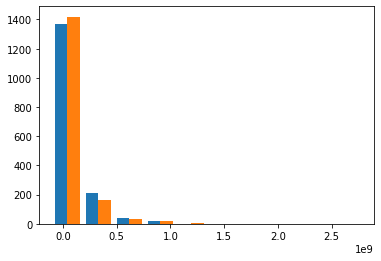

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist([predicted,y_test])

* Dado que la evaluacion visual arroja buenos resultados procedemos a usar el R2 para cuantificar la precision de nuestro modelo

In [22]:
model.score(X_test,y_test)

0.8385987055265401

* Aunque nuestro R2 sea bastante positivo siempre es recomendable hacer una inspeccion visual de las diferencias entre la preddcion y el conjunto de entrenamiento
* Para esto podemos usar los residuales que son la diferencia entre la prediccion del modelo y el conjunto de entrenamiento

In [0]:
residuals = y_test - predicted

* Generamaos una representacion gráfica para ver los errores

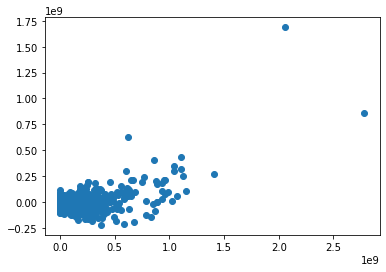

In [24]:
plt.scatter(y_test,residuals)

* Vemos una gran cantidad de datos agrupados en un solo sector y algunos mas dispersos, para hacernos una mejor idea de los posibles errores vamos a transformarlo en un valor porcentual

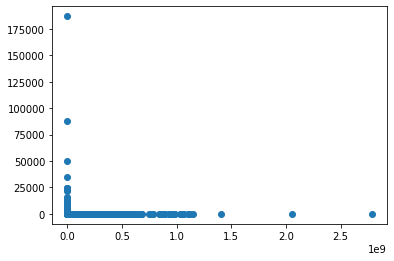

In [25]:
ap_residuals = np.abs(residuals) / y_test
plt.scatter(y_test, ap_residuals)

* En este caso los valores de los ejes son muy grandes y por eso puede llefar a dificultarse la interpretacion de los mismos, para generar un grafico que nos pueda dar una mejor comprension podemos usar una escala logaritmica

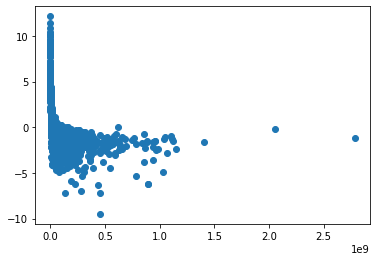

In [26]:
lap_residuals = np.log(ap_residuals)
plt.scatter(y_test, lap_residuals)

* A través de estas represnetaciones gráficas podemos verificar de forma visual el rendimiento reflejado en nuestro R2

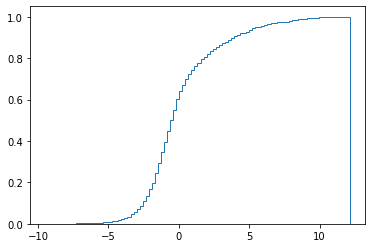

In [27]:
plt.hist(lap_residuals,bins=100, density=1, histtype='step', cumulative=True);